# Exploratory data analysis

*The goal of exploratory data analysis is to develop an understanding of your data. EDA is fundamentally a creative process. And like most creative processes, the key to asking quality questions is to generate a large quantity of questions.*

Key questions:
* Which kind of variation occurs within variables?
* Which kind of co-variation occurs between variables?

https://r4ds.had.co.nz/exploratory-data-analysis.html

In [77]:
# imports

import os, codecs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import the dataset
Let us import the Venetian apprenticeship contracts dataset in memory.

In [78]:
df_contracts = pd.read_csv("https://raw.githubusercontent.com/mromanello/ADA-DHOxSS/master/data/apprenticeship_venice/professions_data.csv", sep=";")
df_professions = pd.read_csv("https://raw.githubusercontent.com/mromanello/ADA-DHOxSS/master/data/apprenticeship_venice/professions_classification.csv", sep=",")


Let's take another look to the dataset.

In [79]:
df_contracts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9653 entries, 0 to 9652
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   page_title                9653 non-null   object 
 1   register                  9653 non-null   object 
 2   annual_salary             7870 non-null   float64
 3   a_profession              9653 non-null   object 
 4   profession_code_strict    9618 non-null   object 
 5   profession_code_gen       9614 non-null   object 
 6   profession_cat            9597 non-null   object 
 7   corporation               9350 non-null   object 
 8   keep_profession_a         9653 non-null   int64  
 9   complete_profession_a     9653 non-null   int64  
 10  enrolmentY                9628 non-null   float64
 11  enrolmentM                9631 non-null   float64
 12  startY                    9533 non-null   float64
 13  startM                    9539 non-null   float64
 14  length  

In [80]:
df_contracts.head(5)

,page_title,register,annual_salary,a_profession,profession_code_strict,profession_code_gen,profession_cat,corporation,keep_profession_a,complete_profession_a,...,personal_care_master,clothes_master,generic_expenses_master,salary_in_kind_master,pledge_goods_master,pledge_money_master,salary_master,female_guarantor,period_cat,incremental_salary
0,Carlo Della sosta (Orese) 1592-08-03,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,orese,orese,orefice,orefice,Oresi,1,1,...,1,1,1,0,0,0,0,0,NaN,0
1,Antonio quondam Andrea (squerariol) 1583-01-09,"asv, giustizia vecchia, accordi dei garzoni, 1...",12.5,squerariol,squerariol,lavori allo squero,lavori allo squero,Squerarioli,1,1,...,0,0,1,0,0,0,1,0,1.0,0
2,Cristofollo di Zuane (batioro in carta) 1591-0...,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,batioro,batioro,battioro,fabbricatore di foglie/fili/cordelle d'oro o a...,Battioro,1,1,...,0,0,0,0,0,0,0,0,NaN,0
3,Illeggibile (marzer) 1584-06-21,"asv, giustizia vecchia, accordi dei garzoni, 1...",NaN,marzer,marzer,marzer,merciaio,Merzeri,1,1,...,0,0,0,0,0,0,0,0,NaN,0
4,Domenico Morebetti (spechier) 1664-09-13,"asv, giustizia vecchia, accordi dei garzoni, 1...",7.0,marzer,marzer,marzer,merciaio,Merzeri,1,1,...,0,0,1,0,0,0,1,0,1.0,0


In [81]:
df_contracts.columns

Index(['page_title', 'register', 'annual_salary', 'a_profession',
       'profession_code_strict', 'profession_code_gen', 'profession_cat',
       'corporation', 'keep_profession_a', 'complete_profession_a',
       'enrolmentY', 'enrolmentM', 'startY', 'startM', 'length', 'has_fled',
       'm_profession', 'm_profession_code_strict', 'm_profession_code_gen',
       'm_profession_cat', 'm_corporation', 'keep_profession_m',
       'complete_profession_m', 'm_gender', 'm_name', 'm_surname',
       'm_patronimic', 'm_atelier', 'm_coords', 'a_name', 'a_age', 'a_gender',
       'a_geo_origins', 'a_geo_origins_std', 'a_coords', 'a_quondam',
       'accommodation_master', 'personal_care_master', 'clothes_master',
       'generic_expenses_master', 'salary_in_kind_master',
       'pledge_goods_master', 'pledge_money_master', 'salary_master',
       'female_guarantor', 'period_cat', 'incremental_salary'],
      dtype='object')

Every row represents an apprenticeship contract. Contracts were registered both at the guild's and at a public office. This is a sample of contracts from a much larger set of records.

Some of the variables we will work with are:
* `annual_salary`: the annual salary paid to the apprencice, if any (in Venetian ducats).
* `a_profession` to `corporation`: increasingly generic classifications for the apprentice's stated profession.
* `startY` and `enrolmentY`: contract start and registration year respectively.
* `length`: of the contract, in years.
* `m_gender` and `a_gender`: of master and apprentice respectively.
* `a_age`: age of the apprentice at entry, in years.
* `female_guarantor`: if at least one of the contract's guarantors was female, boolean.

In [82]:
df_professions.head(3)

,Trascrizione,Standard,Gruppo 0,Gruppo 1,Gruppo 2,Gruppo 3,Gruppo 4,Corporazione
0,al negotio del libraro,librer,libraio,librai - diverse specializzazioni,stampa,altre lavorazioni manifatturiere,beni,"libreri, stampatori e ligadori"
1,arte de far arpicordi,arte de far arpicordi,fabbricatore di arpicordi,fabbricatore di strumenti musicali,musica,altri servizi,servizi,NaN
2,arte de' colori,arte dei colori,fabbricazione/vendita di colori,colori,colori,decorazioni e mestieri dell'arte,beni,spezieri


The professions data frame contains a classification system for each profession as found in the records (transcription, first column). The last column is the guild (or corporation) which governed the given profession. This work was performed manually by historians. We don't use it here as the classifications we need are already part of the main dataframe.

### Questions

* Plot the distribution (histogram) of the apprentices' age, contract length, annual salary and start year.
* Calculate the proportion of female apprentices and masters, and of contracts with a female guarantor.
* How likely it is for a female apprentice to have a female master? And for a male apprentice?

<AxesSubplot:>

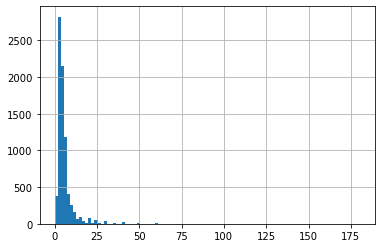

In [83]:
df_contracts.annual_salary.hist(bins=100)

<AxesSubplot:>

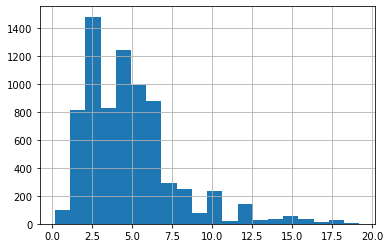

In [84]:
df_contracts[df_contracts.annual_salary < 20].annual_salary.hist(bins=20)

In [85]:
# female apprentices
df_contracts.a_gender.sum()/df_contracts.shape[0]

0.9738941261783901

In [86]:
# female masters
df_contracts.m_gender.sum()/df_contracts.shape[0]

0.976276805138299

In [87]:
# proportion of female apprentices with male masters
# NB the proportion of male apprentices with male masters is > 98%, check it
df_contracts[(df_contracts.a_gender == 0) & (df_contracts.startY < 1800)].m_gender.sum()\
    /df_contracts[(df_contracts.a_gender == 0) & (df_contracts.startY < 1800)].shape[0]

0.7310924369747899

<AxesSubplot:>

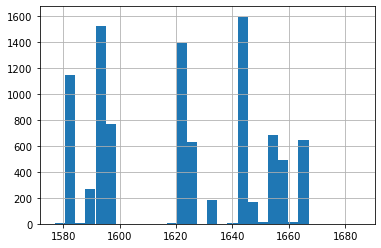

In [88]:
df_contracts.startY.hist(bins=30)

## Summary statistics
A statistic is a measure over a distribution, and it is said to be *robust* if not sensitive to outliers.

* Not robust: min, max, mean, standard deviation.
* Robust: mode, median, other quartiles.

A closer look at the mean:

$\bar{x} = \frac{1}{n} \sum_{i}x_i$

And variance (the standard deviation is the square root of the variance):

$Var(x) = \frac{1}{n} \sum_{i}(x_i - \bar{x})^2$

<img src="images/2560px-Comparison_mean_median_mode.svg.png" width="400px" heigth="400px">

In [89]:
# Not robust: min, max, mean, mode, standard deviation

print(np.mean(s1)) # should be 5
print(np.mean(s2))

5.002417156880661
241.83416895751716


In [90]:
# Robust: median, other quartiles

print(np.quantile(s1, 0.5)) # should coincide with mean and mode
print(np.quantile(s2, 0.5))

5.017864351697466
145.40414456024845


### Quiz

* Calculate the min, max, mode and sd. *hint: explore the numpy documentation!*
* Calculate the 90% quantile values.
* Consider our normally distributed data in s1. Add an outlier (e.g., value 100). What happens to the mean and mode? Write down your answer and then check.

In [91]:
# Let's explore our dataset
df_contracts[["annual_salary","a_age","length"]].describe()

,annual_salary,a_age,length
count,7870.000000,9303.000000,9645.000000
mean,5.916921,14.266688,5.005694
std,6.985214,2.902770,1.462343
min,0.166667,1.000000,0.083333
25%,3.000000,12.000000,4.000000
50%,4.000000,14.000000,5.000000
75%,6.000000,16.000000,6.000000
max,180.000000,50.000000,15.000000


## Looking at empirical distributions

<AxesSubplot:>

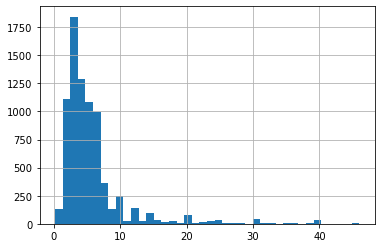

In [92]:
df_contracts[df_contracts.annual_salary < 50].annual_salary.hist(bins=40)

<AxesSubplot:>

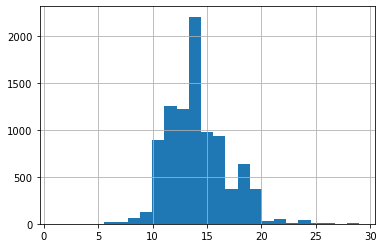

In [93]:
df_contracts[df_contracts.a_age < 30].a_age.hist(bins=25)

### Two very important distributions

#### Normal

Also known as Gaussian, is a bell-shaped distribution with mass around the mean and exponentially decaying on the sides. It is fully characterized by the mean (center of mass) and standard deviation (spread).

https://en.wikipedia.org/wiki/Normal_distribution

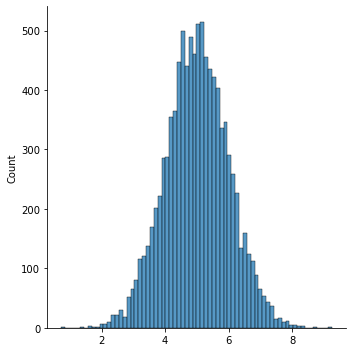

In [94]:
s1 = np.random.normal(5, 1, 10000)
sns.displot(s1)

<AxesSubplot:>

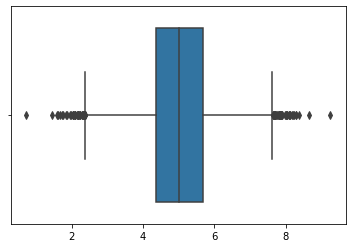

In [95]:
# for boxplots see https://en.wikipedia.org/wiki/Interquartile_range (or ask!)
sns.boxplot(x=s1)

#### Heavy-tailed
Distributions with a small but non-negligible amount of observations with high values. Several probability distributions follow this pattern: https://en.wikipedia.org/wiki/Heavy-tailed_distribution#Common_heavy-tailed_distributions.

We pick the lognormal here: https://en.wikipedia.org/wiki/Log-normal_distribution

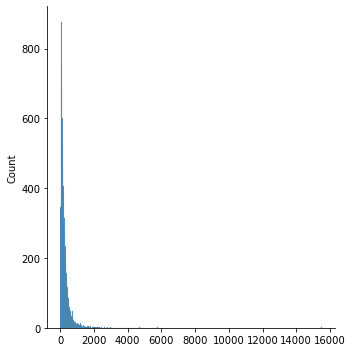

In [96]:
s2 = np.random.lognormal(5, 1, 10000)
sns.displot(s2)

<AxesSubplot:>

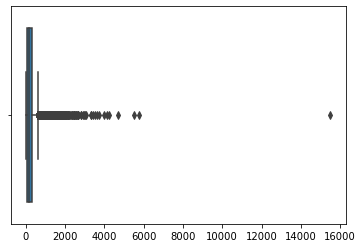

In [97]:
sns.boxplot(x=s2)

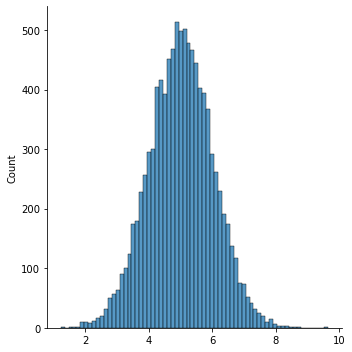

In [98]:
# Why "lognormal"?

sns.displot(np.log(s2))

#### Box plots

<img src="images/eda-boxplot.png" width="800px" heigth="800px">

### Outliers, missing values

An *outlier* is an observation far from the center of mass of the distribution. It might be an error or a genuine observation: this distinction requires domain knowledge. Outliers infuence the outcomes of several statistics and machine learning methods: it is important to decide how to deal with them.

A *missing value* is an observation without a value. There can be many reasons for a missing value: the value might not exist (hence its absence is informative and it should be left empty) or might not be known (hence the value is existing but missing in the dataset and it should be marked as NA).

*One way to think about the difference is with this Zen-like koan: An explicit missing value is the presence of an absence; an implicit missing value is the absence of a presence.*

### Spread

Another important aspect of a distribution is its *spread*. The spread, often measured by the *standard deviation*, tells us how far from the mean the observations are.

<AxesSubplot:ylabel='Count'>

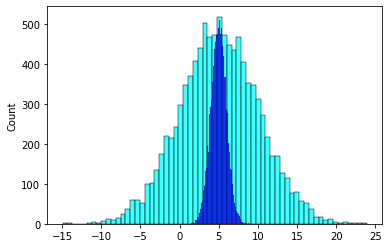

In [99]:
# compare a normally-distributed sample with standard deviation 1 and 5

fig, ax = plt.subplots()
sns.histplot(np.random.normal(5, 5, 10000), color="cyan", ax=ax)
sns.histplot(np.random.normal(5, 1, 10000), color="blue", ax=ax)

## Relating two variables

### Covariance

Measure of joint linear variability of two variables:

<img src="images/covariance.png" width="400px" heigth="400px">

Its normalized version is called the (Pearson's) correlation coefficient:

<img src="images/pearson.png" width="400px" heigth="400px">

Correlation is helpful to spot possible relations, but is of tricky interpretation and is not exhaustive:

<img src="images/800px-Correlation_examples2.svg.png" width="700px" heigth="&00px">

See: https://en.wikipedia.org/wiki/Covariance and https://en.wikipedia.org/wiki/Pearson_correlation_coefficient.

*Note: correlation is not causation!*

In [100]:
df_contracts[["annual_salary","a_age","length"]].corr()

,annual_salary,a_age,length
annual_salary,1.000000,0.205404,-0.361611
a_age,0.205404,1.000000,-0.430062
length,-0.361611,-0.430062,1.000000


<AxesSubplot:xlabel='length', ylabel='annual_salary'>

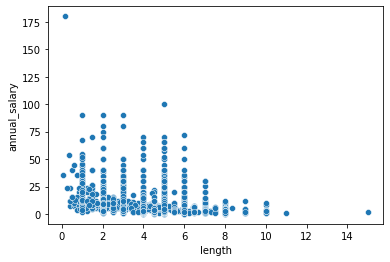

In [101]:
sns.scatterplot(x=df_contracts.length,y=df_contracts.annual_salary)

Note: there are other ways to correlate two variables, e.g., using their rank in the distribution. This is what the *Spearman rank correlation coefficient* does: https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient.

### Quiz

* Try to explore the correlation of other variables in the dataset.
* Can you think of a possible motivation for the trend we see: older apprentices with a shorter contract getting on average a higher annual salary?

---